# Biochar Adsorption coefficient-regression

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

## Importing the dataset and Handling missing values

In [ ]:
# Read the dataset
train_df = pd.read_csv("Congo Red.csv")

# Display the first few rows of the dataset
print(train_df.head())

   pH_pzc        C       H/C     O/C  (O+N)/C    BET     PV     D   T  pH_sol  \
0    8.34  75.2188  0.000347  0.3022   0.4542  136.2  0.084  2.57  25       7   
1   10.13  74.9395  0.000208  0.3022   0.4117  136.2  0.084  2.57  25       7   
2   12.31  91.3381  0.000069  0.0889   0.1351  136.2  0.084  2.57  25       7   
3   12.31  91.3381  0.000069  0.0889   0.1351  120.6  0.076  2.53  25       2   
4   12.31  91.3381  0.000069  0.0889   0.1351  120.6  0.076  2.53  25       4   

       C0       Q  
0  0.8612  0.1864  
1  0.8612  0.1771  
2  0.8612  0.2460  
3  0.8612  0.2865  
4  0.8612  0.2584  


# VISUALIZING THE DATASET

## Analysing the correlation between each feature

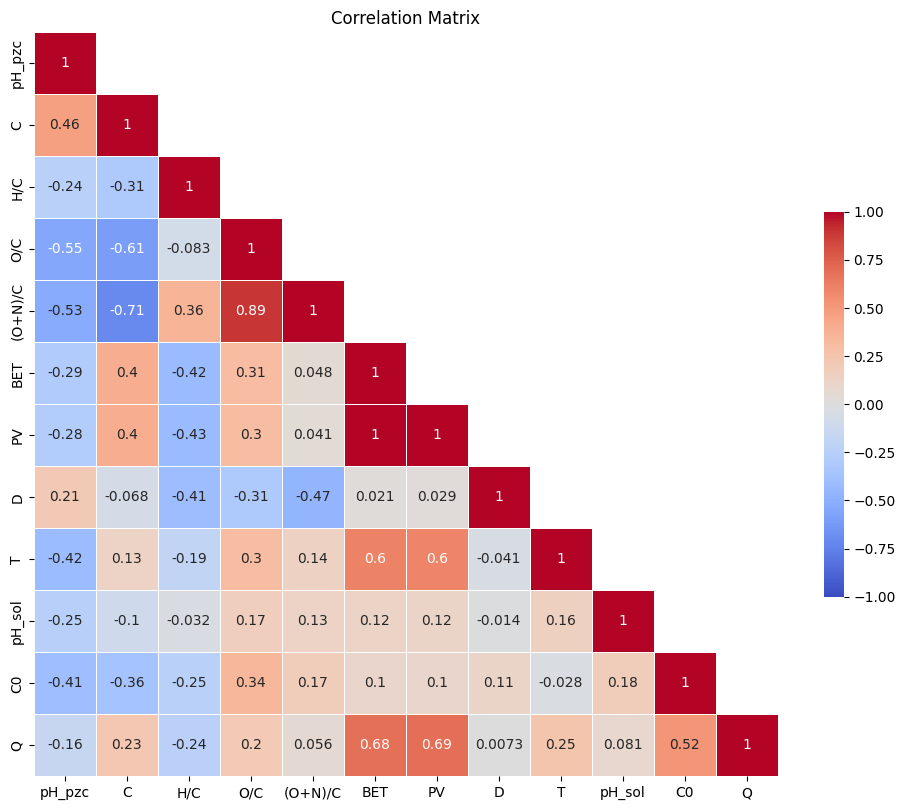

In [ ]:
# Compute the correlation matrix
corr = train_df.corr()

# Create a mask for the upper triangle, excluding the diagonal
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

# Add title
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Compute absolute correlation with 'Q' and sort
correlation_with_Q = abs(corr['Q']).sort_values(ascending=True)
print(correlation_with_Q)

D          0.007291
(O+N)/C    0.056177
pH_sol     0.081183
pH_pzc     0.158946
O/C        0.204367
C          0.230547
H/C        0.239306
T          0.248681
C0         0.517225
BET        0.683116
PV         0.687593
Q          1.000000
Name: Q, dtype: float64


  ## Data Analysis Tables
  

In [ ]:
import pandas as pd

features = ['pH_pzc', 'C', 'H/C', 'O/C', '(O+N)/C', 'BET', 'PV', 'D', 'T', 'pH_sol', 'C0']

# Calculating summary statistics
summary_stats = train_df[features].describe().loc[['mean', '50%', 'std', 'min', 'max']]

# Renaming '50%' to 'median'
summary_stats.rename(index={'50%': 'median'}, inplace=True)

print(summary_stats)

# Exporting to Excel
summary_stats.to_excel('summary_statistics.xlsx', sheet_name='SummaryStats')

print("Summary statistics table exported to 'summary_statistics.xlsx'")


           pH_pzc          C       H/C       O/C   (O+N)/C          BET  \
mean     5.903301  79.768178  0.000482  0.298100  0.332457  1138.724425   
median   5.060000  83.490000  0.000000  0.316700  0.351600  1522.140000   
std      2.774863  11.789813  0.001275  0.144697  0.150208  1019.831821   
min      3.700000  46.420000  0.000000  0.088900  0.135100     0.010000   
max     12.310000  91.338100  0.004146  0.739100  0.765200  2301.610000   

              PV         D          T     pH_sol        C0  
mean    0.595293  2.073994  34.126214   6.699029  1.765778  
median  0.780000  2.094000  30.000000   7.000000  1.370200  
std     0.530099  1.210633   8.558541   1.714042  1.532101  
min     0.000400  0.654800  15.000000   2.000000  0.000000  
max     1.205000  6.143000  50.000000  11.000000  5.762300  
Summary statistics table exported to 'summary_statistics.xlsx'


## Full Violin Plot

<ipython-input-71-4d0340dffde0>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=train_df, x=column, y=None, hue=None, inner='quartile', palette=[custom_palette[i]], legend=False)  # Trim the tails
<ipython-input-71-4d0340dffde0>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=train_df, x=column, y=None, hue=None, inner='quartile', palette=[custom_palette[i]], legend=False)  # Trim the tails
<ipython-input-71-4d0340dffde0>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=train_df, x=column, y=None, hue=None, inner

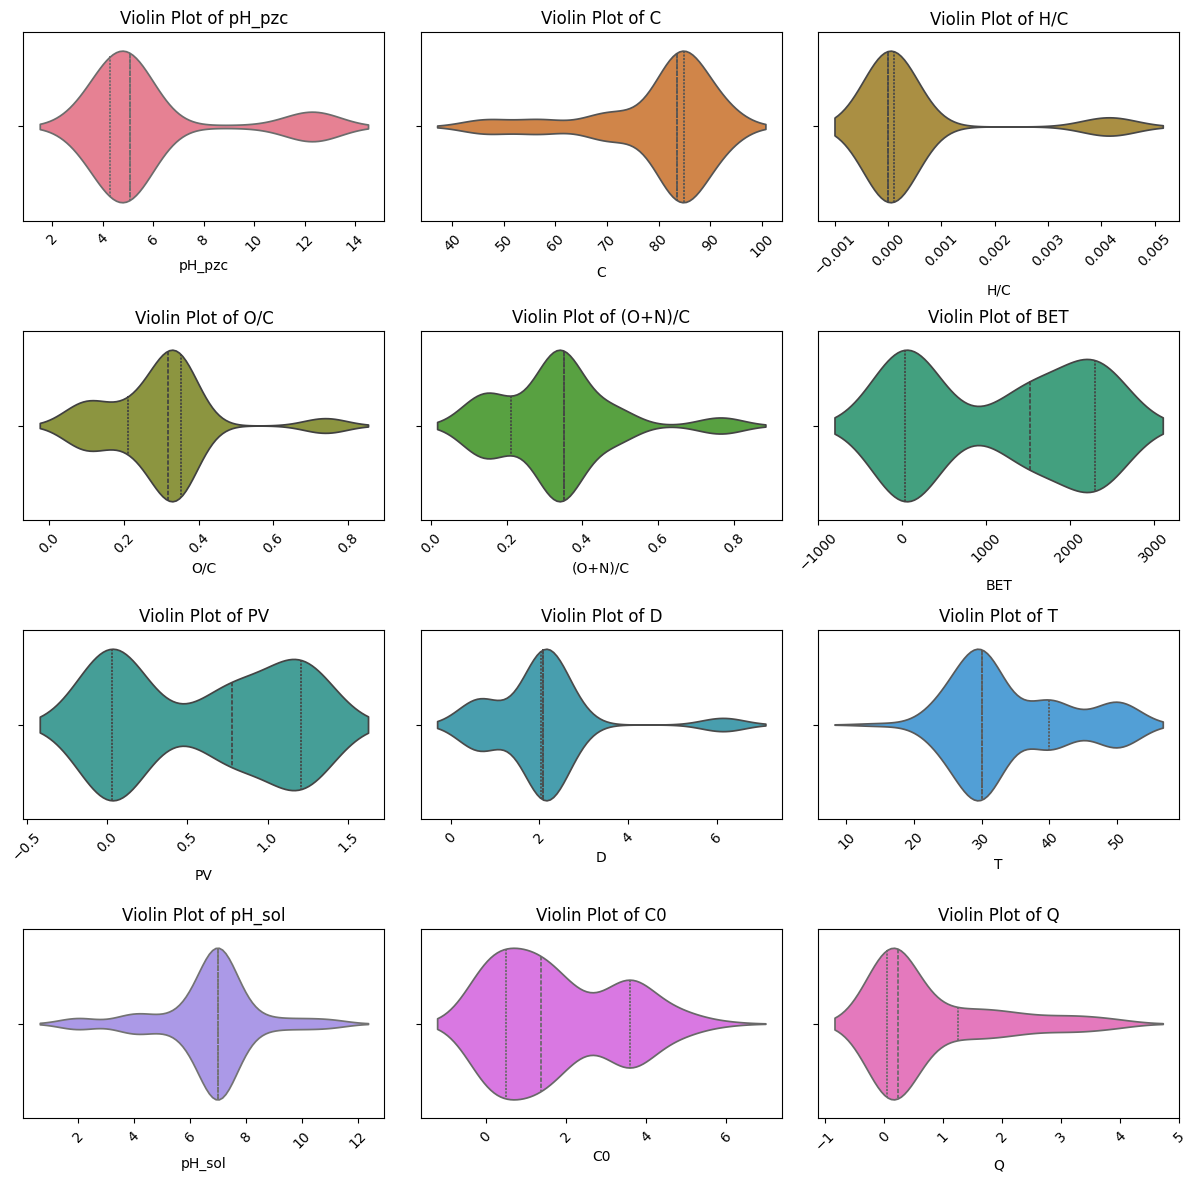

In [ ]:
import math

# Calculate the number of rows and columns for subplot arrangement
num_features = len(train_df.columns)
num_cols = 3  # Number of columns for subplots
num_rows = math.ceil(num_features / num_cols)  # Calculate the number of rows

# Set the figure size based on the number of subplots
fig_width = 4  # Width of each subplot
fig_height = 3  # Height of each subplot
plt.figure(figsize=(num_cols * fig_width, num_rows * fig_height))

# Define a custom color palette
custom_palette = sns.color_palette("husl", num_features)

# Plot violin plots for each feature on separate subplots
for i, column in enumerate(train_df.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.violinplot(data=train_df, x=column, y=None, hue=None, inner='quartile', palette=[custom_palette[i]], legend=False)  # Trim the tails
    plt.title(f'Violin Plot of {column}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


## Train Test Split

In [ ]:
X = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(82, 11)
(21, 11)
(82,)
(21,)


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fitting the scaler on the training data and transforming it
x_train = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
x_test = scaler.transform(x_test)

# Applying Regression Models

### Multiple Linear Regression

R^2 Score on Test Set: 0.4574590443292369
Mean Squared Error (MSE) on Test Set: 0.46522894000570114
Root Mean Squared Error (RMSE) on Test Set: 0.6820769311490466


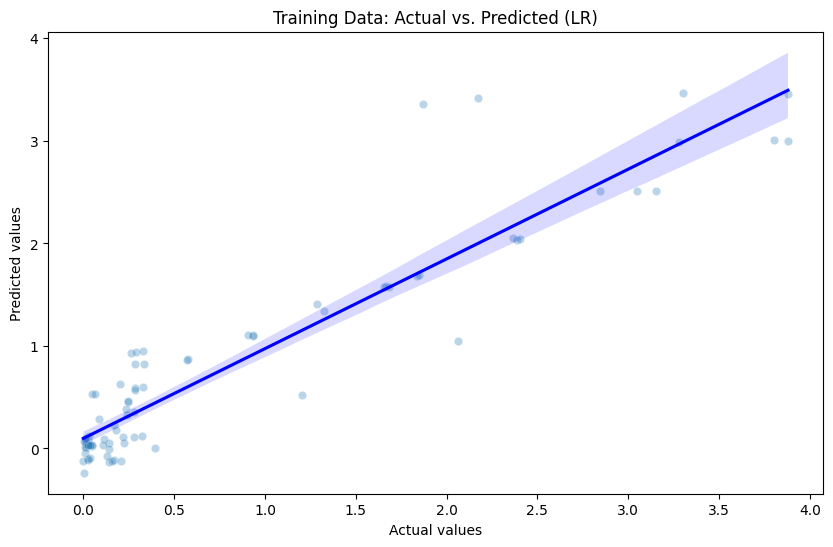

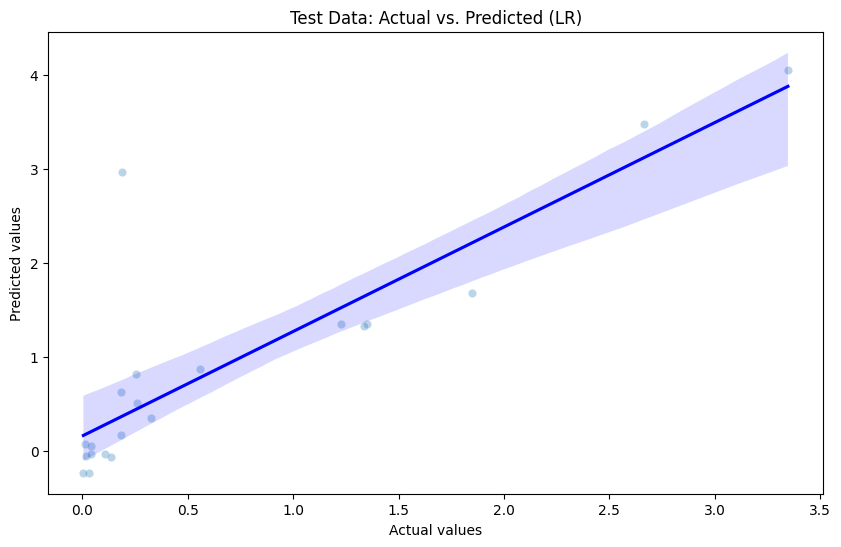

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Creating and fit the linear regression model
model1 = LinearRegression()
model1.fit(x_train, y_train)

# Predictions on training and test sets
y_train_pred = model1.predict(x_train)
y_test_pred = model1.predict(x_test)


# Calculating R^2 score for test set
r2 = r2_score(y_test, y_test_pred)
print(f'R^2 Score on Test Set: {r2}')

# Calculating Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for test set
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error (MSE) on Test Set: {mse}')
print(f'Root Mean Squared Error (RMSE) on Test Set: {rmse}')

# Function to plot actual vs. predicted values with regression line
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))

    # Scatter plot of actual vs. predicted values
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.3)

    # Plotting the regression line
    sns.regplot(x=y_true, y=y_pred, scatter=False, color='blue')

    # Plotting formatting
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title(title)
    plt.show()

# Plotting for training data
plot_actual_vs_predicted(y_train, y_train_pred, 'Training Data: Actual vs. Predicted (LR)')

# Plotting for test data
plot_actual_vs_predicted(y_test, y_test_pred, 'Test Data: Actual vs. Predicted (LR)')

### Polynomial Regression

In [ ]:
'''#Creating polynomial features for training set
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(x_train)

# Creating polynomial features for test set
X_test_poly = poly_features.transform(x_test)

# Fitting the polynomial regression model
model2 = LinearRegression()
model2.fit(X_train_poly, y_train)

# Predictions on training and test sets
y_train_pred = model2.predict(X_train_poly)
y_test_pred = model2.predict(X_test_poly)

# Calculating R^2 score for test set
r2_poly = r2_score(y_test, y_test_pred)
print(f'R^2 Score on Test Set: {r2_poly}')

# Calculating Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for test set
mse_poly = mean_squared_error(y_test, y_test_pred)
rmse_poly = np.sqrt(mse_poly)
print(f'Mean Squared Error (MSE) on Test Set: {mse_poly}')
print(f'Root Mean Squared Error (RMSE) on Test Set: {rmse_poly}')

# Plotting for training data
plot_actual_vs_predicted(y_train, y_train_pred, 'Training Data: Actual vs. Predicted (PR)')

# Plotting for test data
plot_actual_vs_predicted(y_test, y_test_pred, 'Test Data: Actual vs. Predicted (PR)')'''

"#Creating polynomial features for training set\npoly_features = PolynomialFeatures(degree=2)\nX_train_poly = poly_features.fit_transform(x_train)\n\n# Creating polynomial features for test set\nX_test_poly = poly_features.transform(x_test)\n\n# Fitting the polynomial regression model\nmodel2 = LinearRegression()\nmodel2.fit(X_train_poly, y_train)\n\n# Predictions on training and test sets\ny_train_pred = model2.predict(X_train_poly)\ny_test_pred = model2.predict(X_test_poly)\n\n# Calculating R^2 score for test set\nr2_poly = r2_score(y_test, y_test_pred)\nprint(f'R^2 Score on Test Set: {r2_poly}')\n\n# Calculating Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for test set\nmse_poly = mean_squared_error(y_test, y_test_pred)\nrmse_poly = np.sqrt(mse_poly)\nprint(f'Mean Squared Error (MSE) on Test Set: {mse_poly}')\nprint(f'Root Mean Squared Error (RMSE) on Test Set: {rmse_poly}')\n\n# Plotting for training data\nplot_actual_vs_predicted(y_train, y_train_pred, 'Training Dat

### Support Vector Regression

R^2 Score on Test Set: 0.8488154261658023
Mean Squared Error (MSE) on Test Set: 0.12964079171339088
Root Mean Squared Error (RMSE) on Test Set: 0.3600566507001237


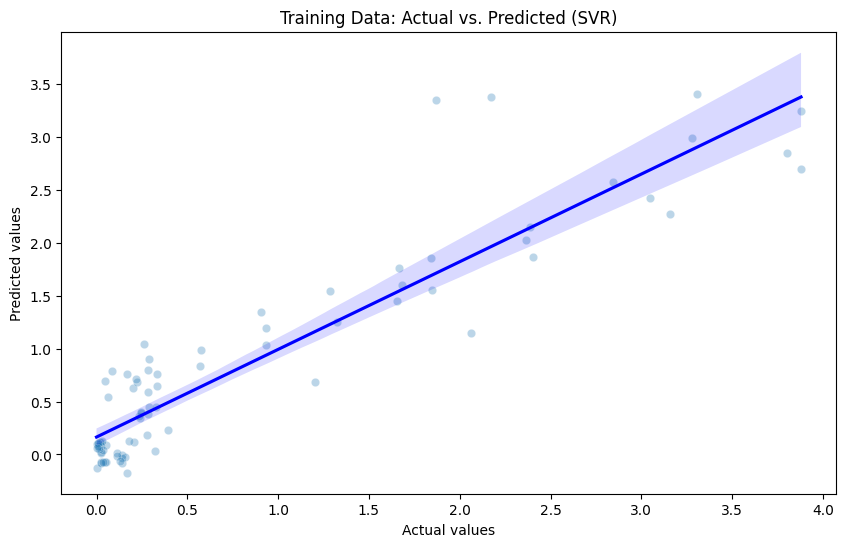

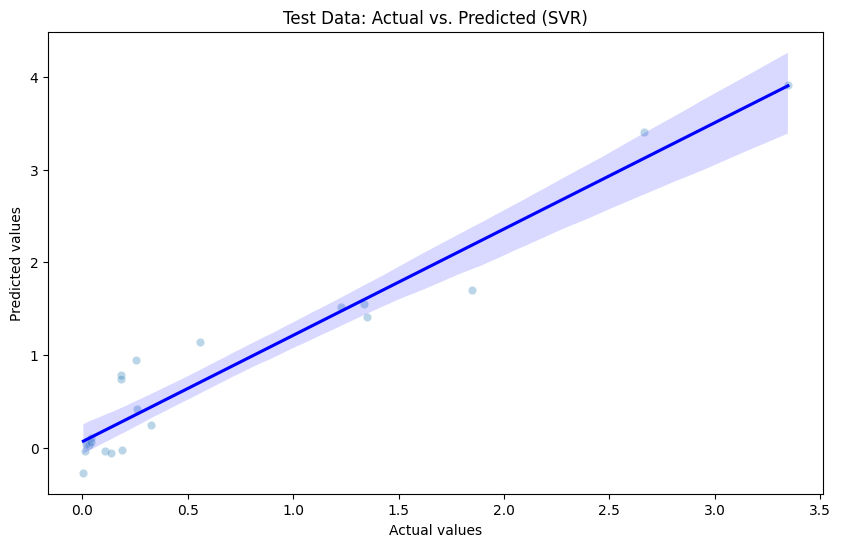

In [ ]:
# Create and fit the SVM regression model
model3 = SVR(kernel='linear')
model3.fit(x_train, y_train)

# Predictions on training and test sets
y_train_pred = model3.predict(x_train)
y_test_pred = model3.predict(x_test)

# Calculate R^2 score for test set
r2_svr = r2_score(y_test, y_test_pred)
print(f'R^2 Score on Test Set: {r2_svr}')

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for test set
mse_svr = mean_squared_error(y_test, y_test_pred)
rmse_svr = np.sqrt(mse_svr)
print(f'Mean Squared Error (MSE) on Test Set: {mse_svr}')
print(f'Root Mean Squared Error (RMSE) on Test Set: {rmse_svr}')

# Plot for training data
plot_actual_vs_predicted(y_train, y_train_pred, 'Training Data: Actual vs. Predicted (SVR)')

# Plot for test data
plot_actual_vs_predicted(y_test, y_test_pred, 'Test Data: Actual vs. Predicted (SVR)')


### Decision Tree Regression

Decision Tree Regression:
R^2 Score on Test Set: 0.9741061624699623
Mean Squared Error (MSE) on Test Set: 0.022203969047619027
Root Mean Squared Error (RMSE) on Test Set: 0.14900996291395763


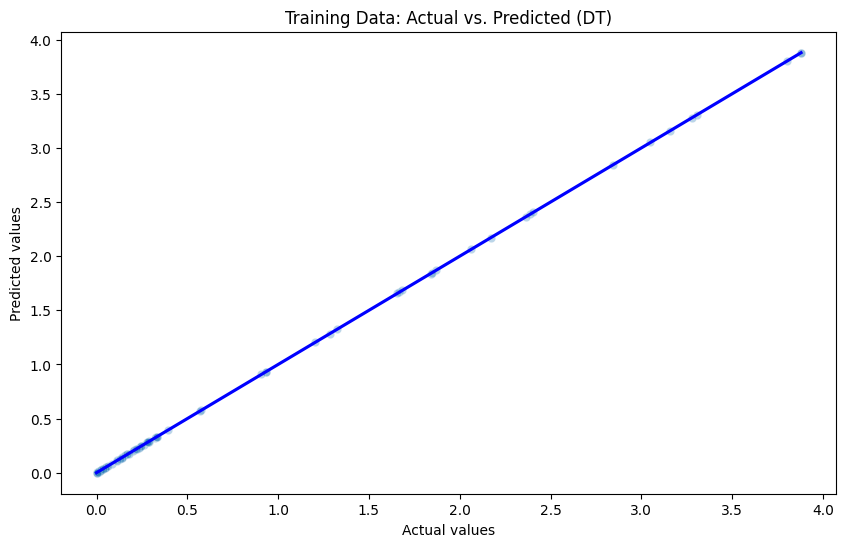

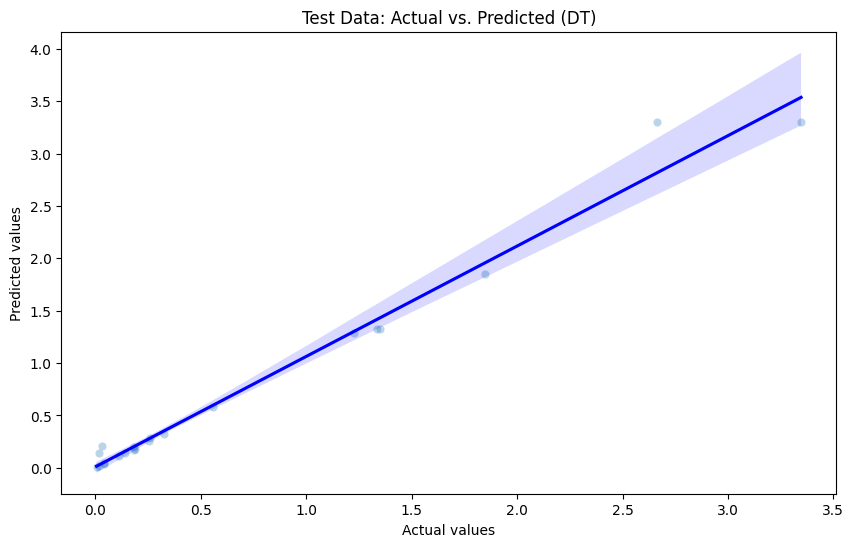

In [ ]:
# Decision Tree Regression
# Create and fit the Decision Tree regression model
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

# Predictions on training and test sets
y_train_pred_dt = dt_model.predict(x_train)
y_test_pred_dt = dt_model.predict(x_test)

# Calculate R^2 score, MSE, and RMSE for Decision Tree Regression on test set
r2_dt = r2_score(y_test, y_test_pred_dt)
mse_dt = mean_squared_error(y_test, y_test_pred_dt)
rmse_dt = np.sqrt(mse_dt)
print("Decision Tree Regression:")
print(f'R^2 Score on Test Set: {r2_dt}')
print(f'Mean Squared Error (MSE) on Test Set: {mse_dt}')
print(f'Root Mean Squared Error (RMSE) on Test Set: {rmse_dt}')

# Plot for training data
plot_actual_vs_predicted(y_train, y_train_pred_dt, 'Training Data: Actual vs. Predicted (DT)')

# Plot for test data
plot_actual_vs_predicted(y_test, y_test_pred_dt, 'Test Data: Actual vs. Predicted (DT)')



### Random Forest Regression


Random Forest Regression:
R^2 Score on Test Set: 0.9785348109536857
Mean Squared Error (MSE) on Test Set: 0.018406402397202398
Root Mean Squared Error (RMSE) on Test Set: 0.13567019715914913


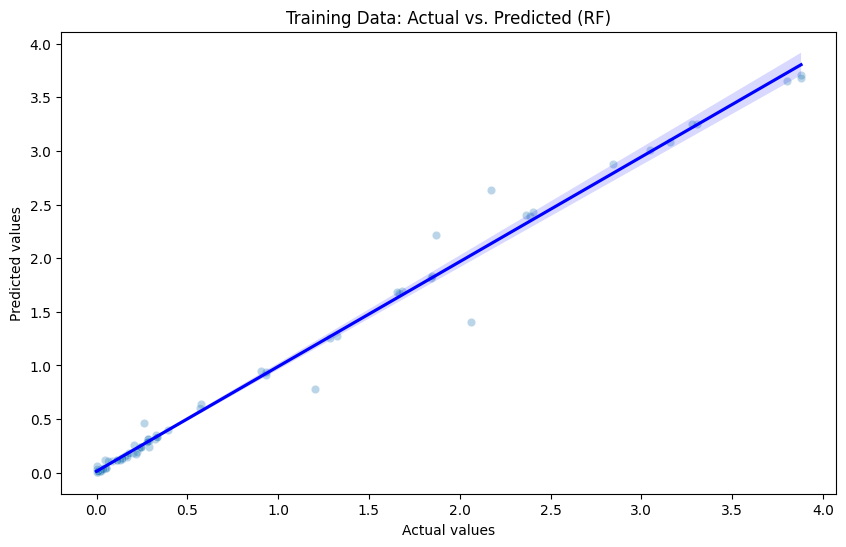

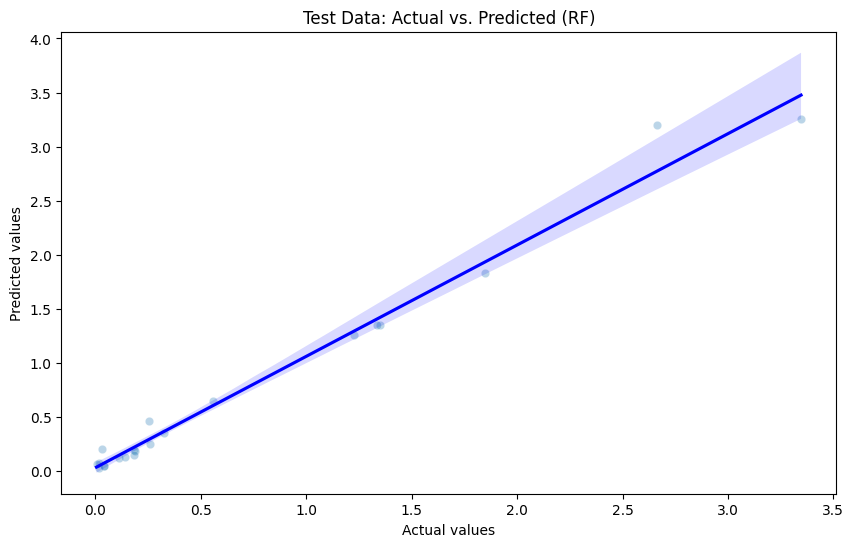

In [ ]:
# Random Forest Regression
# Create and fit the Random Forest regression model
rf_model = RandomForestRegressor(n_estimators = 200)
rf_model.fit(x_train, y_train)

# Predictions on training and test sets
y_train_pred_rf = rf_model.predict(x_train)
y_test_pred_rf = rf_model.predict(x_test)

# Calculate R^2 score, MSE, and RMSE for Random Forest Regression on test set
r2_rf = r2_score(y_test, y_test_pred_rf)
mse_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print("\nRandom Forest Regression:")
print(f'R^2 Score on Test Set: {r2_rf}')
print(f'Mean Squared Error (MSE) on Test Set: {mse_rf}')
print(f'Root Mean Squared Error (RMSE) on Test Set: {rmse_rf}')

# Plot for training data
plot_actual_vs_predicted(y_train, y_train_pred_rf, 'Training Data: Actual vs. Predicted (RF)')

# Plot for test data
plot_actual_vs_predicted(y_test, y_test_pred_rf, 'Test Data: Actual vs. Predicted (RF)')




### Ridge Regression


Random Forest Regression:
R^2 Score on Test Set: 0.88737857896407
Mean Squared Error (MSE) on Test Set: 0.09657288317654089
Root Mean Squared Error (RMSE) on Test Set: 0.31076177882188294


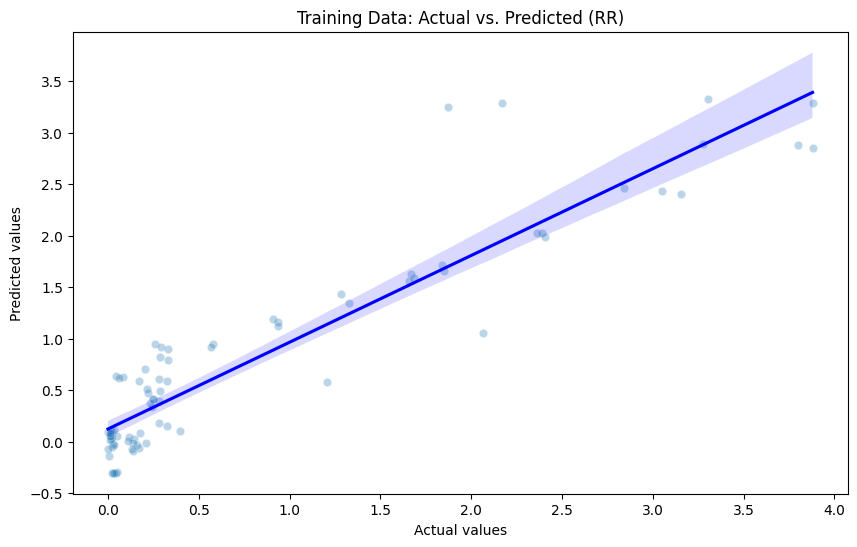

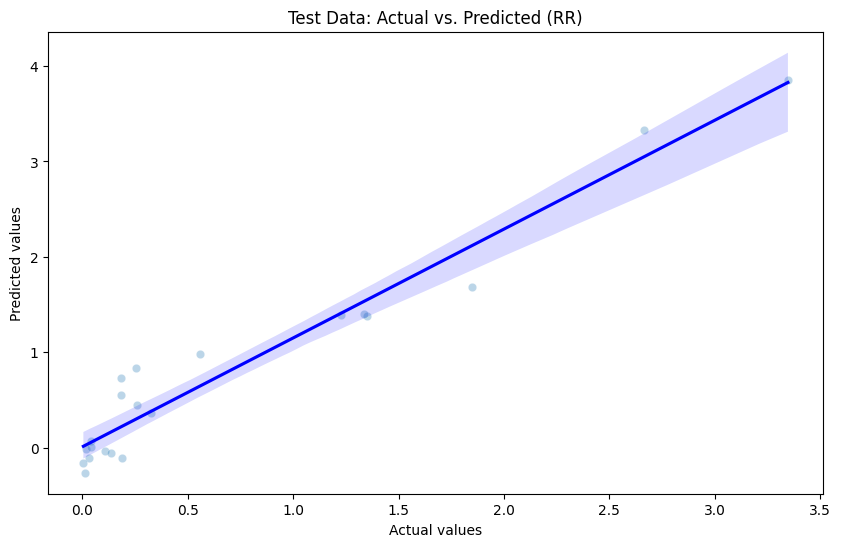

In [ ]:
# Ridge Regression
# Create and fit the Ridge regression model

rig_model = Ridge(alpha=1.0)
rig_model.fit(x_train, y_train)

# Predictions on training and test sets
y_train_pred_rig = rig_model.predict(x_train)
y_test_pred_rig = rig_model.predict(x_test)

# Calculate R^2 score, MSE, and RMSE for Ridge Regression on test set
r2_ = r2_score(y_test, y_test_pred_rig)
mse_ = mean_squared_error(y_test, y_test_pred_rig)
rmse_ = np.sqrt(mse_)
print("\nRandom Forest Regression:")
print(f'R^2 Score on Test Set: {r2_}')
print(f'Mean Squared Error (MSE) on Test Set: {mse_}')
print(f'Root Mean Squared Error (RMSE) on Test Set: {rmse_}')

# Plot for training data
plot_actual_vs_predicted(y_train, y_train_pred_rig, 'Training Data: Actual vs. Predicted (RR)')

# Plot for test data
plot_actual_vs_predicted(y_test, y_test_pred_rig, 'Test Data: Actual vs. Predicted (RR)')



### XGB Regression


Random Forest Regression:
R^2 Score on Test Set: 0.9577358563614737
Mean Squared Error (MSE) on Test Set: 0.03624150866341655
Root Mean Squared Error (RMSE) on Test Set: 0.19037202699823455


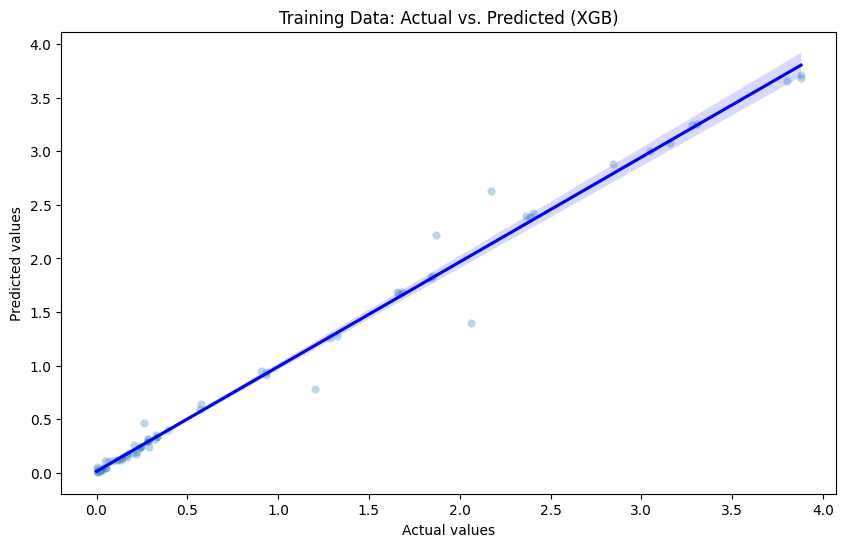

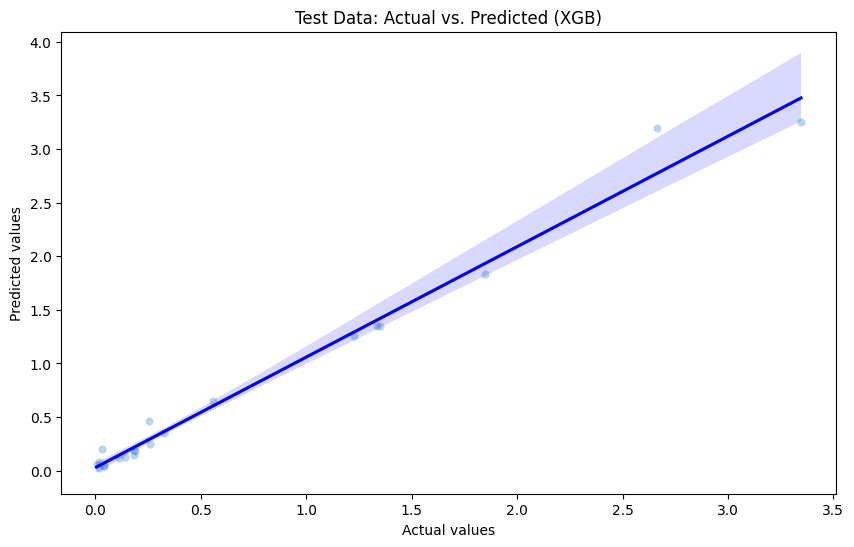

In [ ]:
# XGB Regression
# Create and fit the XGB Regression model

xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)

# Predictions on training and test sets
y_train_pred_xgb = xgb_model.predict(x_train)
y_test_pred_xgb = xgb_model.predict(x_test)

# Calculate R^2 score, MSE, and RMSE for XGB Regressor on test set
r2_xgb = r2_score(y_test, y_test_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
print("\nRandom Forest Regression:")
print(f'R^2 Score on Test Set: {r2_xgb}')
print(f'Mean Squared Error (MSE) on Test Set: {mse_xgb}')
print(f'Root Mean Squared Error (RMSE) on Test Set: {rmse_xgb}')

# Plot for training data
plot_actual_vs_predicted(y_train, y_train_pred_rf, 'Training Data: Actual vs. Predicted (XGB)')

# Plot for test data
plot_actual_vs_predicted(y_test, y_test_pred_rf, 'Test Data: Actual vs. Predicted (XGB)')


## R^2 score, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) values for multiple models

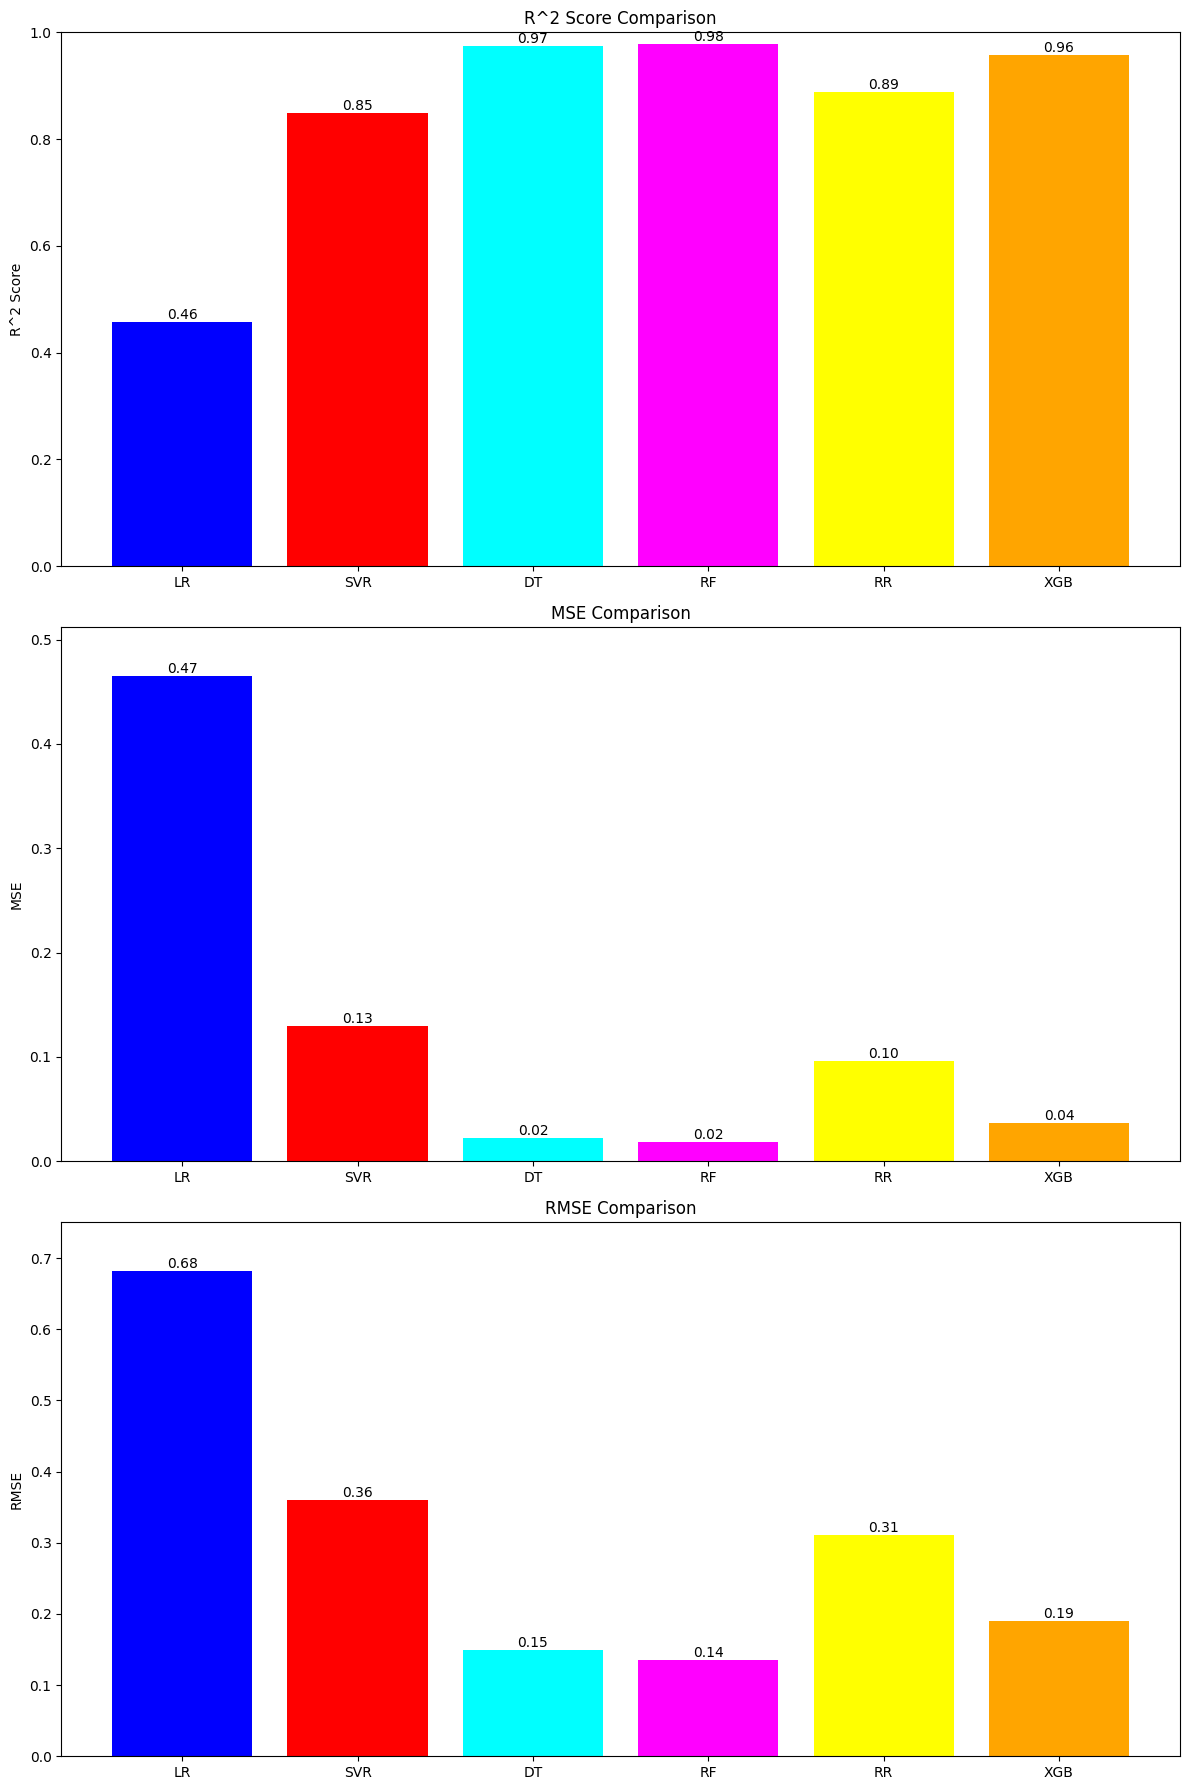

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have calculated r2_dt, mse_dt, rmse_dt, r2_rf, mse_rf, and rmse_rf

# Model names
models = ['LR','SVR','DT','RF','RR','XGB']

# R^2 scores
r2_scores = [r2 , r2_svr , r2_dt , r2_rf , r2_ , r2_xgb]

# MSE values
mse_values = [mse , mse_svr , mse_dt , mse_rf , mse_ , mse_xgb]

# RMSE values
rmse_values = [rmse , rmse_svr , rmse_dt , rmse_rf , rmse_ , rmse_xgb]

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# Set the spacing between subplots
plt.subplots_adjust(hspace=0.5)


# Bar plot for R^2 scores
ax[0].bar(models, r2_scores, color=['blue' , 'red', 'cyan', 'magenta', 'yellow', 'orange'])
ax[0].set_ylabel('R^2 Score')
ax[0].set_title('R^2 Score Comparison')
ax[0].set_ylim(0, 1)  # Adjust based on your range of R^2 scores
ax[0].bar_label(ax[0].containers[0], fmt='%.2f')  # Add labels

# Bar plot for MSE values
ax[1].bar(models, mse_values, color=['blue' , 'red', 'cyan', 'magenta', 'yellow', 'orange'])
ax[1].set_ylabel('MSE')
ax[1].set_title('MSE Comparison')
ax[1].set_ylim(0, max(mse_values) * 1.1)  # Adjust based on your range of MSE values
ax[1].bar_label(ax[1].containers[0], fmt='%.2f')  # Add labels

# Bar plot for RMSE values
ax[2].bar(models, rmse_values, color=['blue' , 'red', 'cyan', 'magenta', 'yellow', 'orange'])
ax[2].set_ylabel('RMSE')
ax[2].set_title('RMSE Comparison')
ax[2].set_ylim(0, max(rmse_values) * 1.1)  # Adjust based on your range of RMSE values
ax[2].bar_label(ax[2].containers[0], fmt='%.2f')  # Add labels

plt.tight_layout()
plt.show()



# Dimentionality Reduction

### Principle Component Analysis

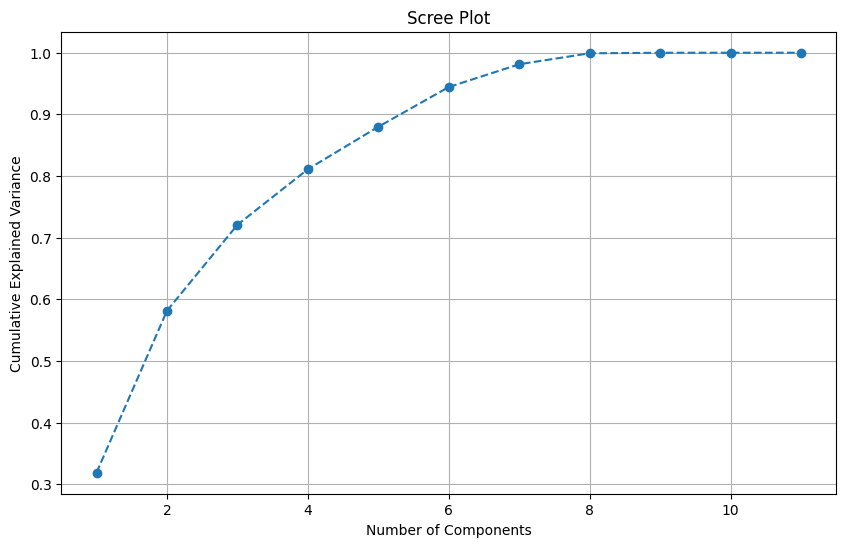

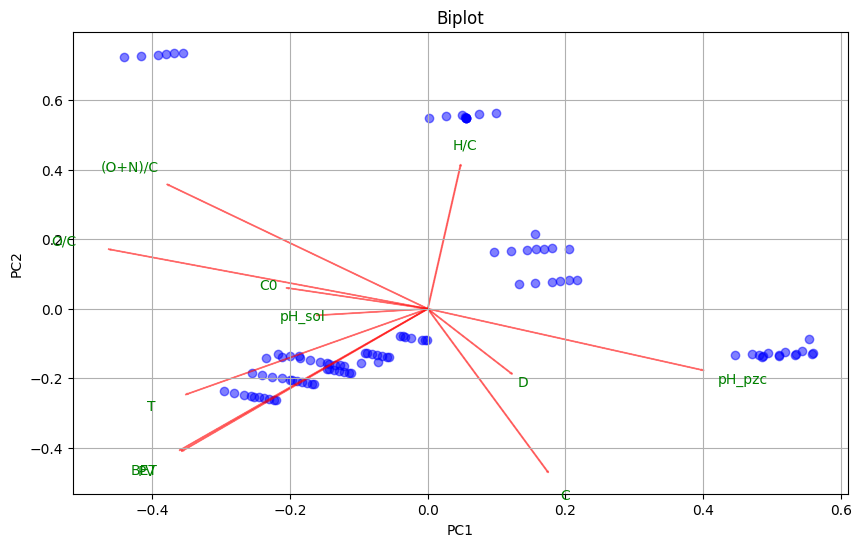

   Principal Component  Explained Variance  Cumulative Variance
0                  PC1        3.187769e-01             0.318777
1                  PC2        2.626754e-01             0.581452
2                  PC3        1.394562e-01             0.720909
3                  PC4        9.013068e-02             0.811039
4                  PC5        6.885685e-02             0.879896
5                  PC6        6.443437e-02             0.944330
6                  PC7        3.697272e-02             0.981303
7                  PC8        1.778854e-02             0.999092
8                  PC9        8.244044e-04             0.999916
9                 PC10        8.389329e-05             1.000000
10                PC11        1.250505e-08             1.000000


In [ ]:
from sklearn.decomposition import PCA

column_names = ['pH_pzc', 'C', 'H/C', 'O/C', '(O+N)/C', 'BET', 'PV', 'D', 'T', 'pH_sol', 'C0', 'Q']

# Perform PCA on the training set
pca = PCA()
x_train_pca = pca.fit_transform(x_train)

# Transform the test set using the same PCA
x_test_pca = pca.transform(x_test)

# Scree Plot
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()

#Biplot Function

def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())

    # Plot all data points together without distinguishing between training and testing sets
    plt.scatter(xs * scalex, ys * scaley, color='blue', alpha=0.5)

    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()


# Generate Biplot
plt.figure(figsize=(10, 6))
biplot(np.vstack((x_train_pca, x_test_pca)), np.transpose(pca.components_), labels=column_names)
plt.title('Biplot')
plt.show()

# Summary Plot (Explained Variance)
summary_df = pd.DataFrame({
    'Principal Component': ['PC' + str(i) for i in range(1, len(explained_variance) + 1)],
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
})

print(summary_df)


## Optimal number of principal components

Optimal number of components: 8
Best R² score: 0.9469109017780066


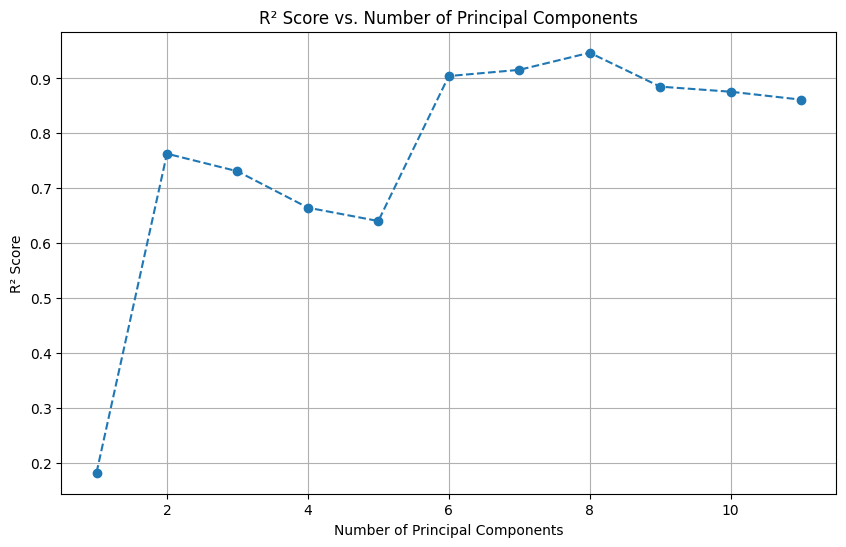

In [ ]:
# Perform PCA on the training set
pca = PCA()
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Find the optimal number of components
max_r2 = 0
optimal_components = 0
r2_scores = []

for n_components in range(1, x_train_pca.shape[1] + 1):
    pca = PCA(n_components=n_components)
    x_train_pca_n = pca.fit_transform(x_train)
    x_test_pca_n = pca.transform(x_test)

    # Train a random forest regression model
    rf_model.fit(x_train_pca_n, y_train)

    # Predict on the test set
    y_test_pred = rf_model.predict(x_test_pca_n)

    # Calculate R² score
    r2 = r2_score(y_test, y_test_pred)
    r2_scores.append(r2)

    # Check if this is the best R² score so far
    if r2 > max_r2:
        max_r2 = r2
        optimal_components = n_components

print(f'Optimal number of components: {optimal_components}')
print(f'Best R² score: {max_r2}')

# Plot R² scores vs. number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(r2_scores) + 1), r2_scores, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('R² Score')
plt.title('R² Score vs. Number of Principal Components')
plt.grid()
plt.show()


# K fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Define the number of folds
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(rf_model, x_train, y_train, cv=k, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(rf_model, x_train, y_train, cv=k, scoring='r2')


# Since cross_val_score returns negative MSE, we take the negative to get positive MSE values
mse_scores = -scores

# Calculate the mean and standard deviation of the MSE scores
mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print(f"Mean MSE: {mean_mse}")
print(f"Standard Deviation of MSE: {std_mse}")
print(f"Mean R2 Score: {mean_r2}")

Mean MSE: 0.08805066913462072
Standard Deviation of MSE: 0.10177144303638183
Mean R2 Score: 0.8444821649484554


## K Fold Cross validation table for all models

In [ ]:
# Initializing models
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regressor': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=300),
    'Ridge Regression': Ridge(),
    'XGBoost': XGBRegressor(objective='reg:squarederror')
}

# Dictionary to store results
results = {
    'Model': [],
    'R²': [],
    'MSE': [],
    'RMSE': []
}

# KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Train and evaluate each model using K-fold cross-validation
for name, model in models.items():
    r2_scores = []
    mse_scores = []
    rmse_scores = []

    for train_index, test_index in kf.split(x_train):
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        r2_scores.append(r2)
        mse_scores.append(mse)
        rmse_scores.append(rmse)

    results['Model'].append(name)
    results['R²'].append(np.mean(r2_scores))
    results['MSE'].append(np.mean(mse_scores))
    results['RMSE'].append(np.mean(rmse_scores))

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Export to Excel
results_df.to_excel('model_evaluation_metrics_kfold.xlsx', index=False)

print("Model evaluation metrics table exported to 'model_evaluation_metrics_kfold.xlsx'")

from google.colab import files
files.download('model_evaluation_metrics_kfold.xlsx')


Model evaluation metrics table exported to 'model_evaluation_metrics_kfold.xlsx'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Hyperparameter Tuning

### Using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)

# Fit Grid Search
grid_search.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on test data
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)
r2_score = r2_score(y_test, y_pred)
print(f'r2_score: {r2_score}')
mse = mean_squared_error(y_test, y_pred)
print("Test Mean Squared Error:", mse)


Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8883908890441669
r2_score: 0.9740176938001569
Test Mean Squared Error: 0.022279830943476058


# Assessing the Best Model Performance

## Acutal vs Predicted Value

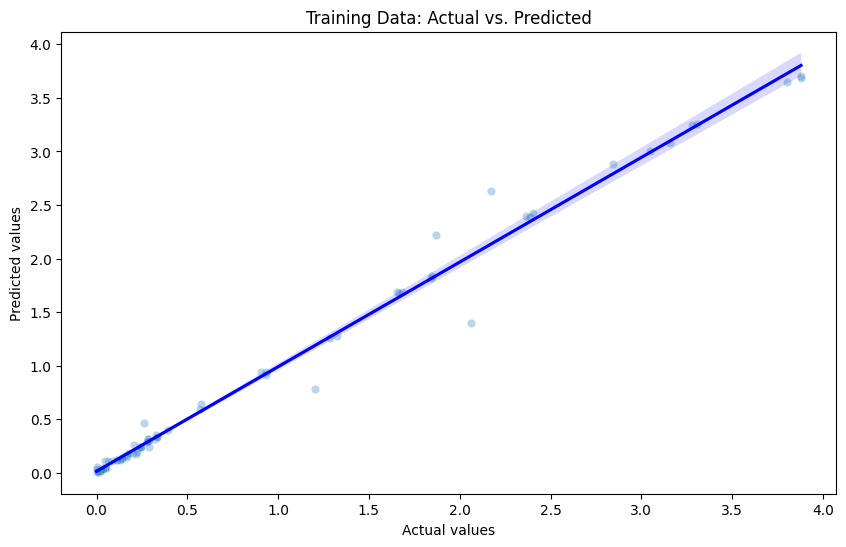

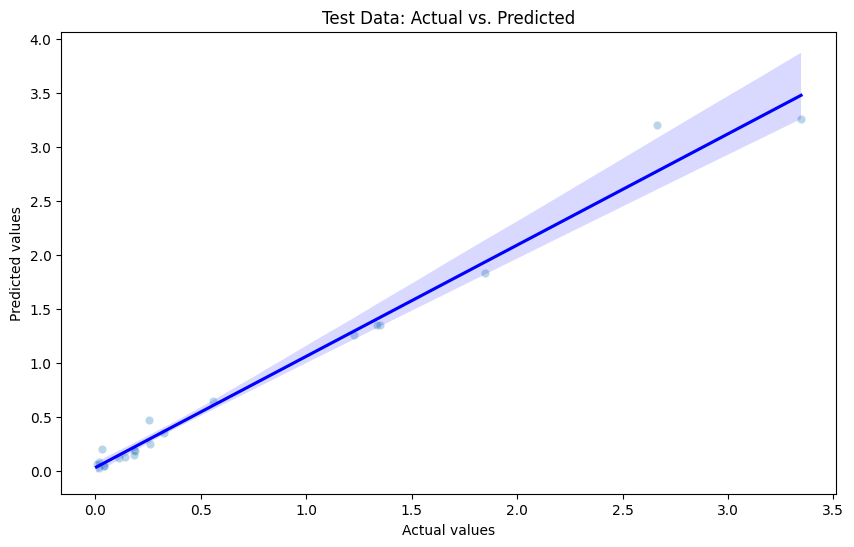

In [ ]:
# Make predictions on training and test data

y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

# Function to plot actual vs. predicted values with regression line
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))

    # Scatter plot of actual vs. predicted values
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.3)

    # Plot the regression line
    sns.regplot(x=y_true, y=y_pred, scatter=False, color='blue')

    # Plot formatting
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title(title)
    plt.show()

# Plotting for training data
plot_actual_vs_predicted(y_train, y_train_pred_rf, 'Training Data: Actual vs. Predicted')

# Plotting for test data
plot_actual_vs_predicted(y_test, y_test_pred_rf, 'Test Data: Actual vs. Predicted')


## Feature Importance Plot

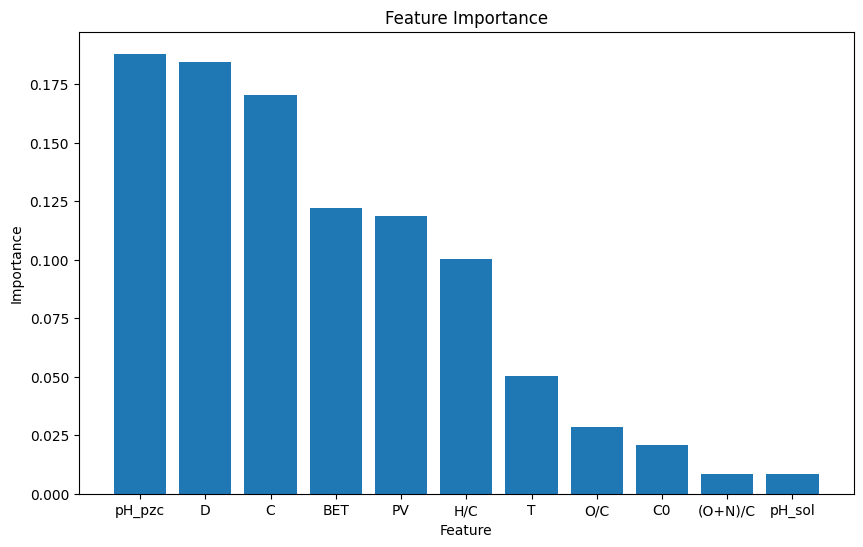

In [ ]:
# Feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = ['pH_pzc', 'C', 'H/C', 'O/C', '(O+N)/C', 'BET', 'PV',
                 'D', 'T','pH_sol', 'C0']

# Plotting
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

## SHAP Summary Plot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 7.0 MB/s eta 0:00:00


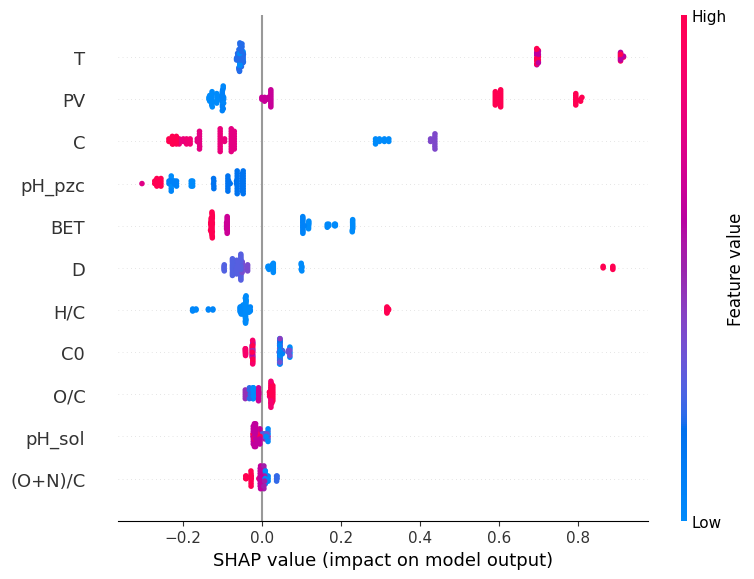

In [ ]:
!pip install shap
import shap

# SHAP summary plot
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(x_train)
feature_names = ['pH_pzc', 'C', 'H/C', 'O/C', '(O+N)/C', 'BET', 'PV', 'D', 'T', 'pH_sol', 'C0']

shap.summary_plot(shap_values, x_train, feature_names=feature_names)

## Partial Dependence plot

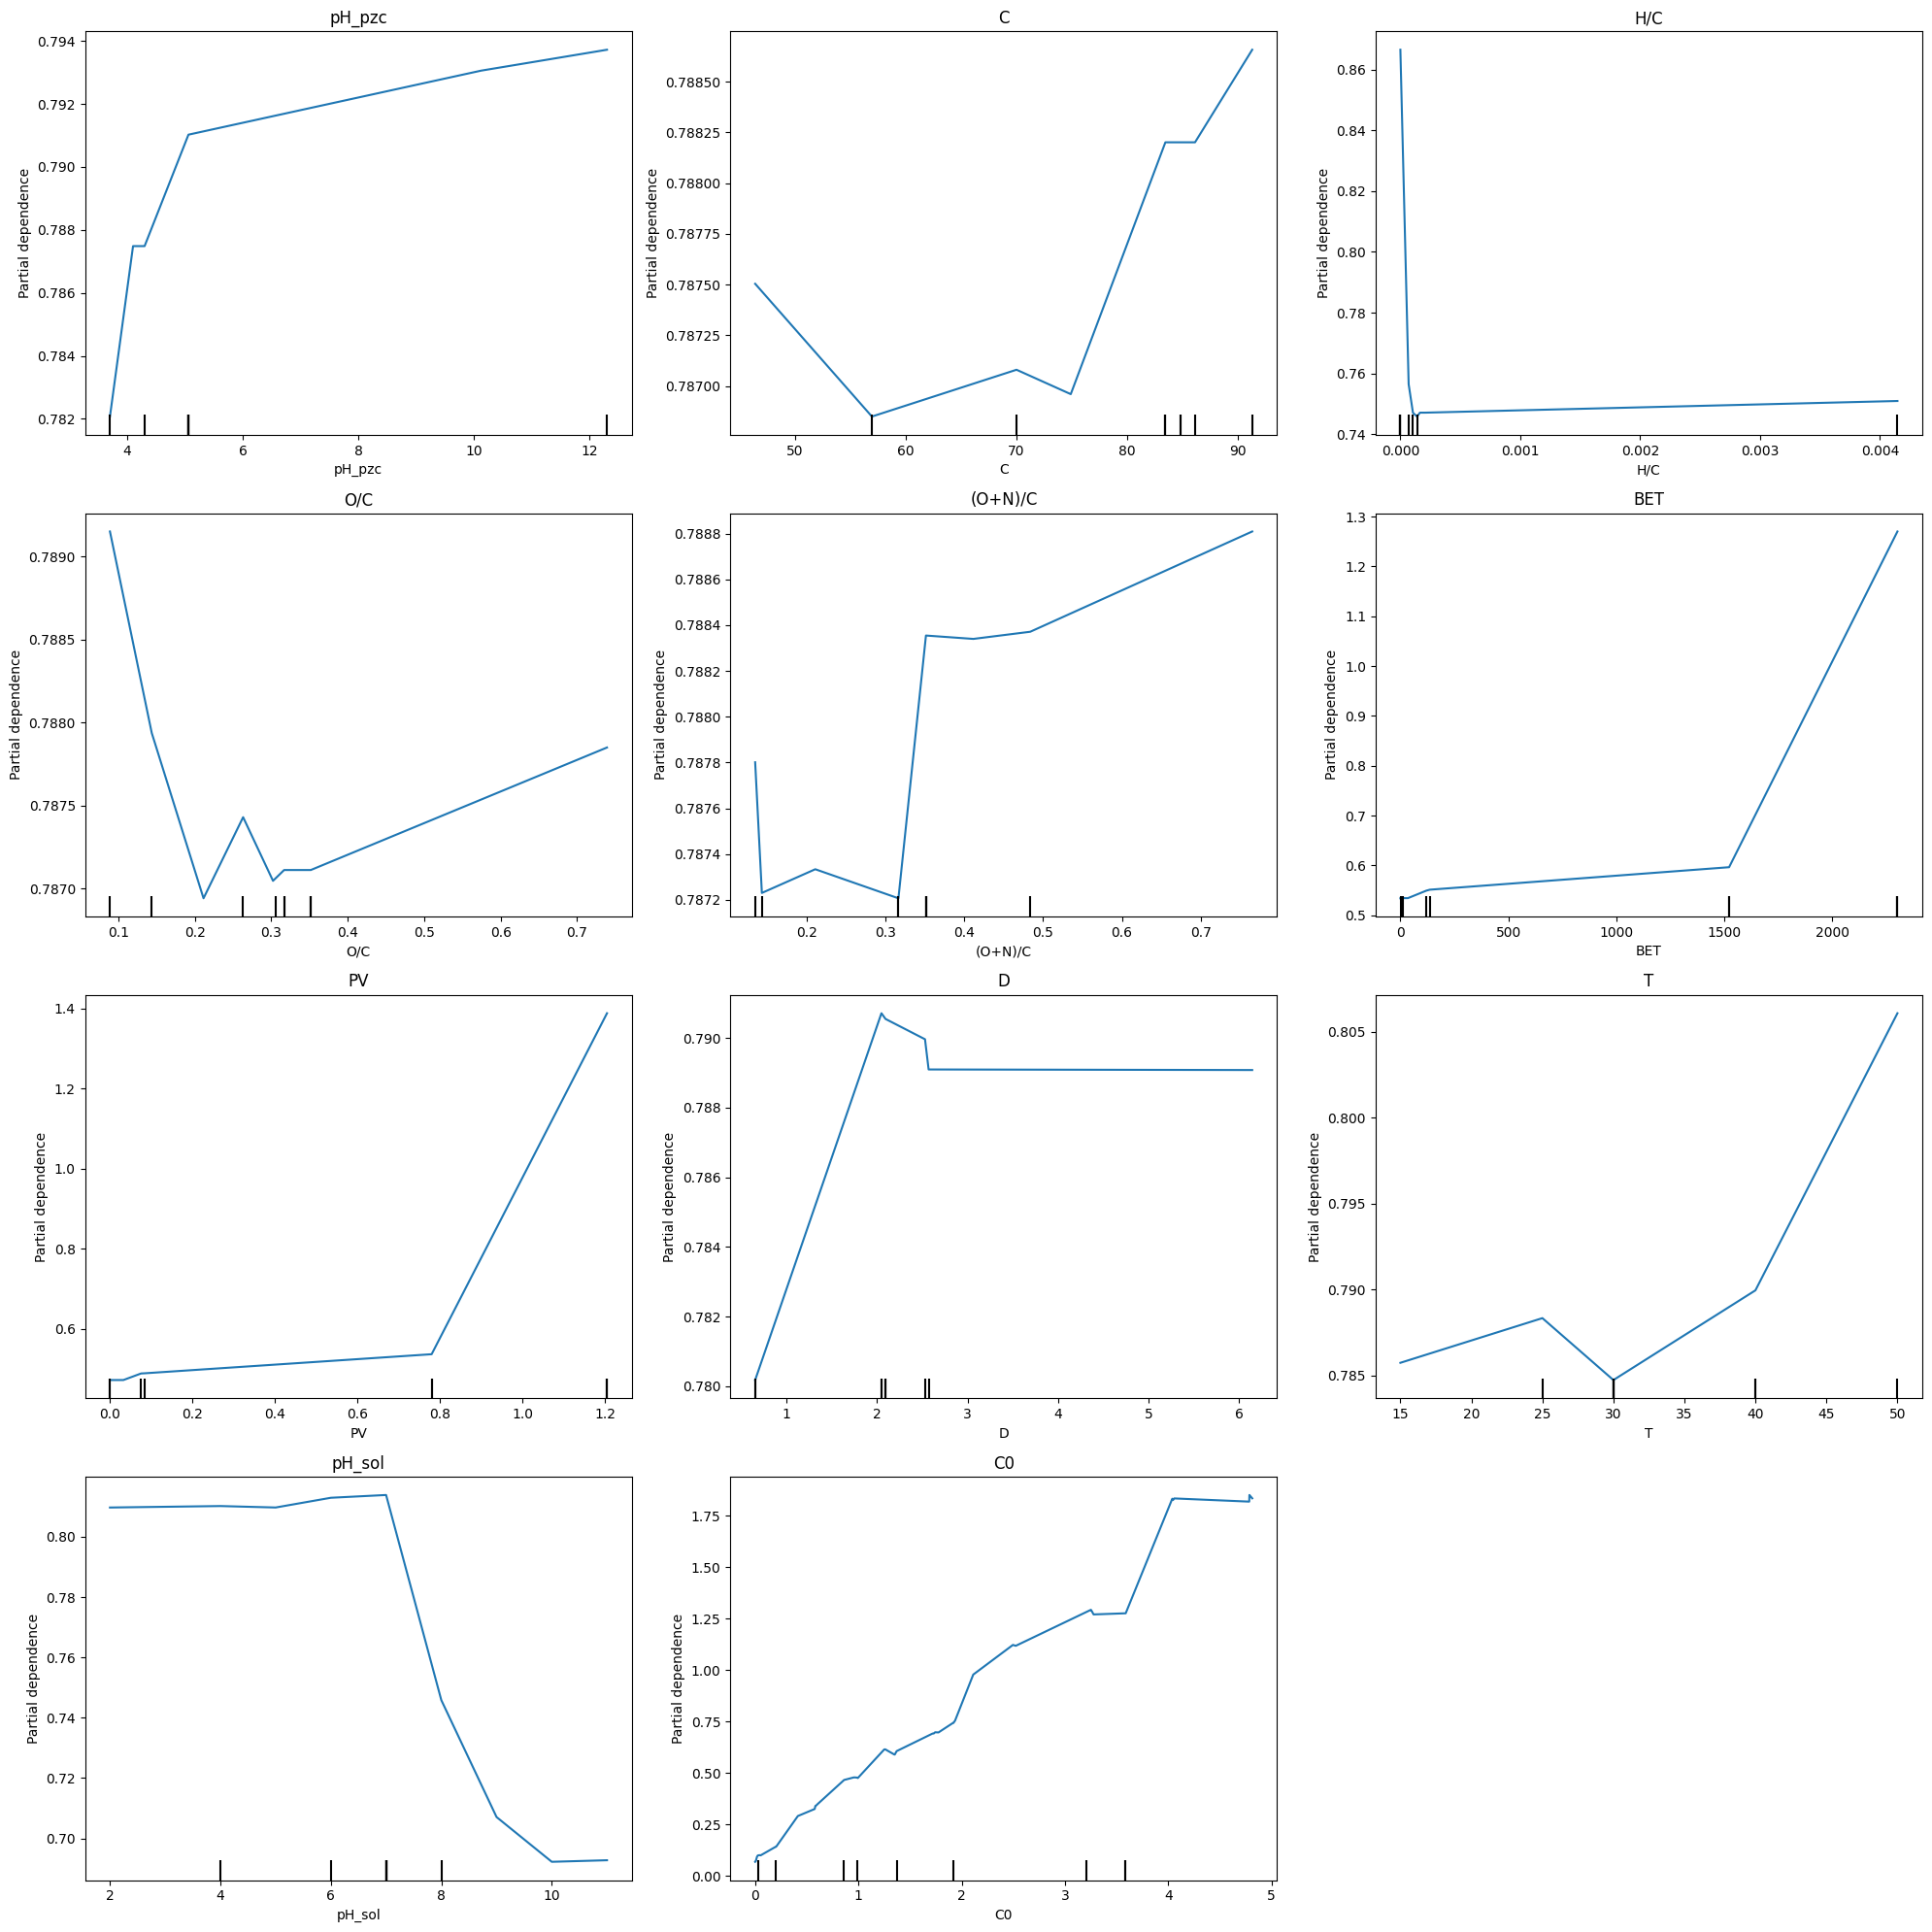

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
feature_names = ['pH_pzc', 'C', 'H/C', 'O/C', '(O+N)/C', 'BET', 'PV', 'D', 'T', 'pH_sol', 'C0']

# Separating features and target variable
X = train_df[feature_names]
ynew = train_df['Q']

# Splitting the data into training and testing sets
x_train, x_test, y_trainnew, y_testnew = train_test_split(X, ynew, test_size=0.2, random_state=42)

# Training a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_trainnew)

# Creating PDP for the specified features
num_features = len(feature_names)
n_cols = 3  # Adjusting this value to change the number of columns in the plot
n_rows = (num_features // n_cols) + int(num_features % n_cols != 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

for i, feature in enumerate(feature_names):
    ax = axes[i]
    PartialDependenceDisplay.from_estimator(
        rf_model, x_train, [feature], feature_names=feature_names, grid_resolution=100, ax=ax
    )
    ax.set_title(feature)

# Removing empty subplots if the number of features is not a perfect multiple of n_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

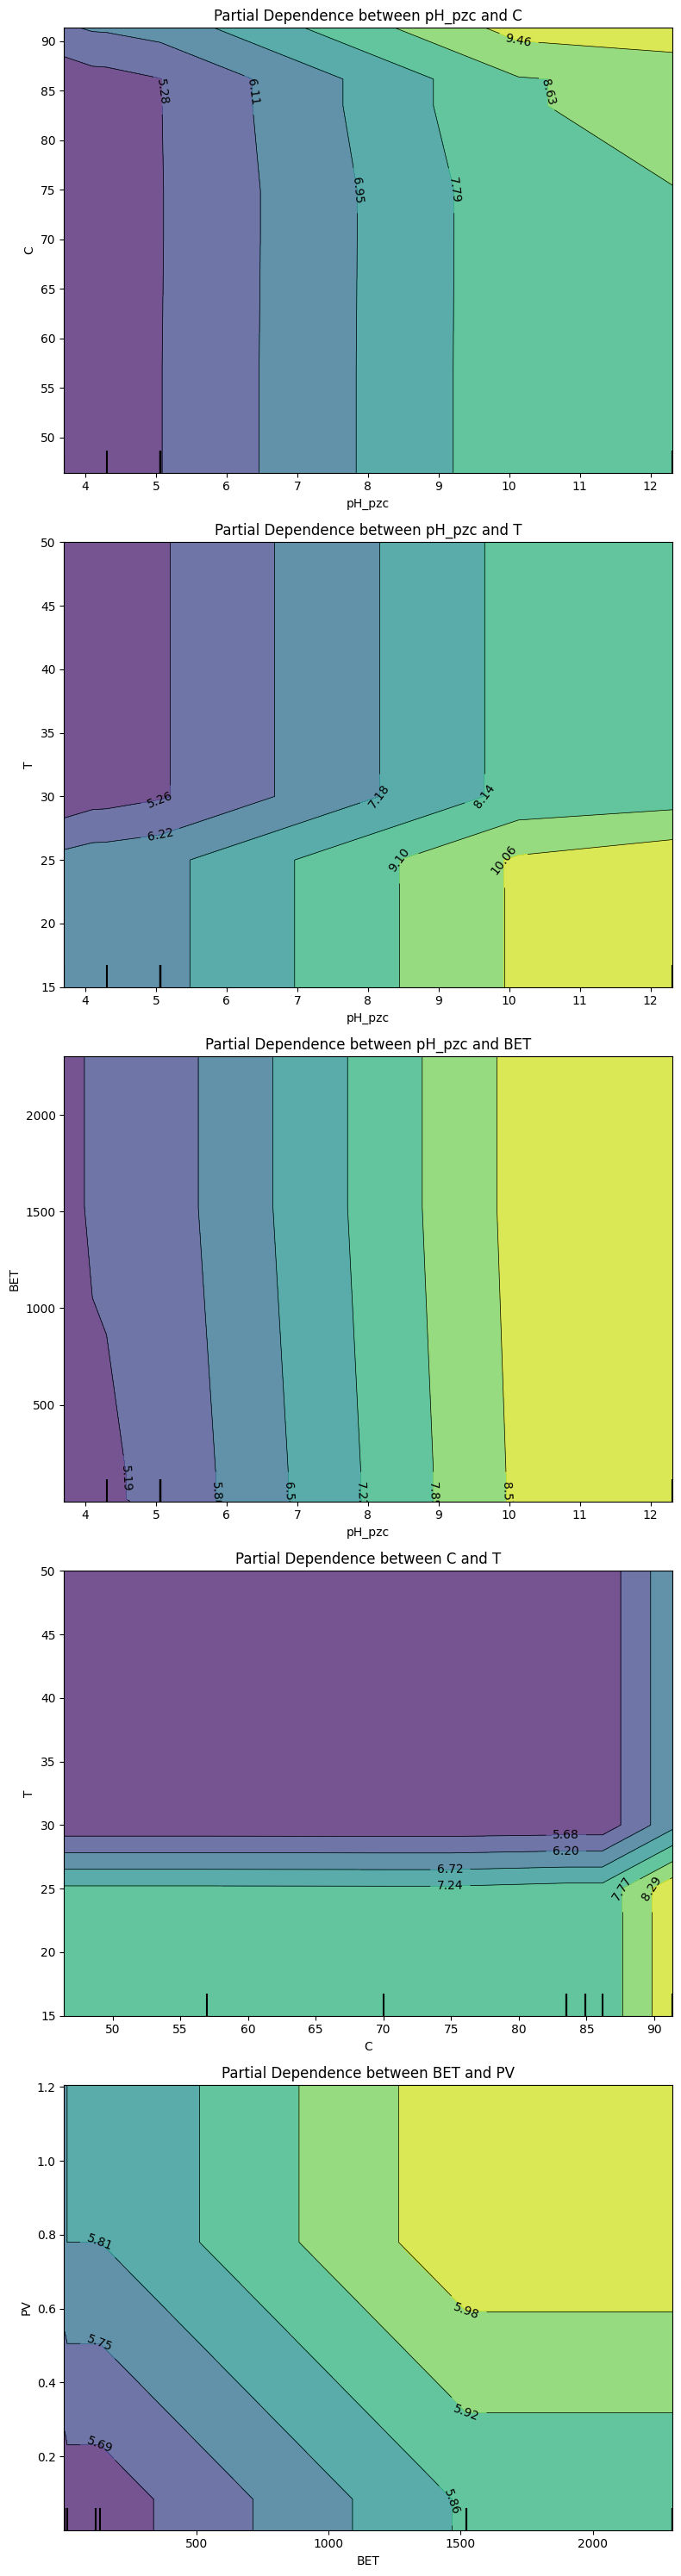

In [ ]:
# Creating 2D PDP for selected pairs of features
pairs_of_features = [('pH_pzc', 'C'), ('pH_pzc','T'), ('pH_pzc','BET') , ('C', 'T'), ('BET', 'PV')]
pairs_of_indices = [(feature_names.index(pair[0]), feature_names.index(pair[1])) for pair in pairs_of_features]

fig, axes = plt.subplots(len(pairs_of_features), 1, figsize=(8, 6 * len(pairs_of_features)))

for ax, (i, j) in zip(axes, pairs_of_indices):
    display = PartialDependenceDisplay.from_estimator(
        rf_model, x_train, [(i, j)], feature_names=feature_names, grid_resolution=50, ax=ax
    )
    ax.set_title(f'Partial Dependence between {feature_names[i]} and {feature_names[j]}')

plt.tight_layout()
plt.show()

## Residual Plot

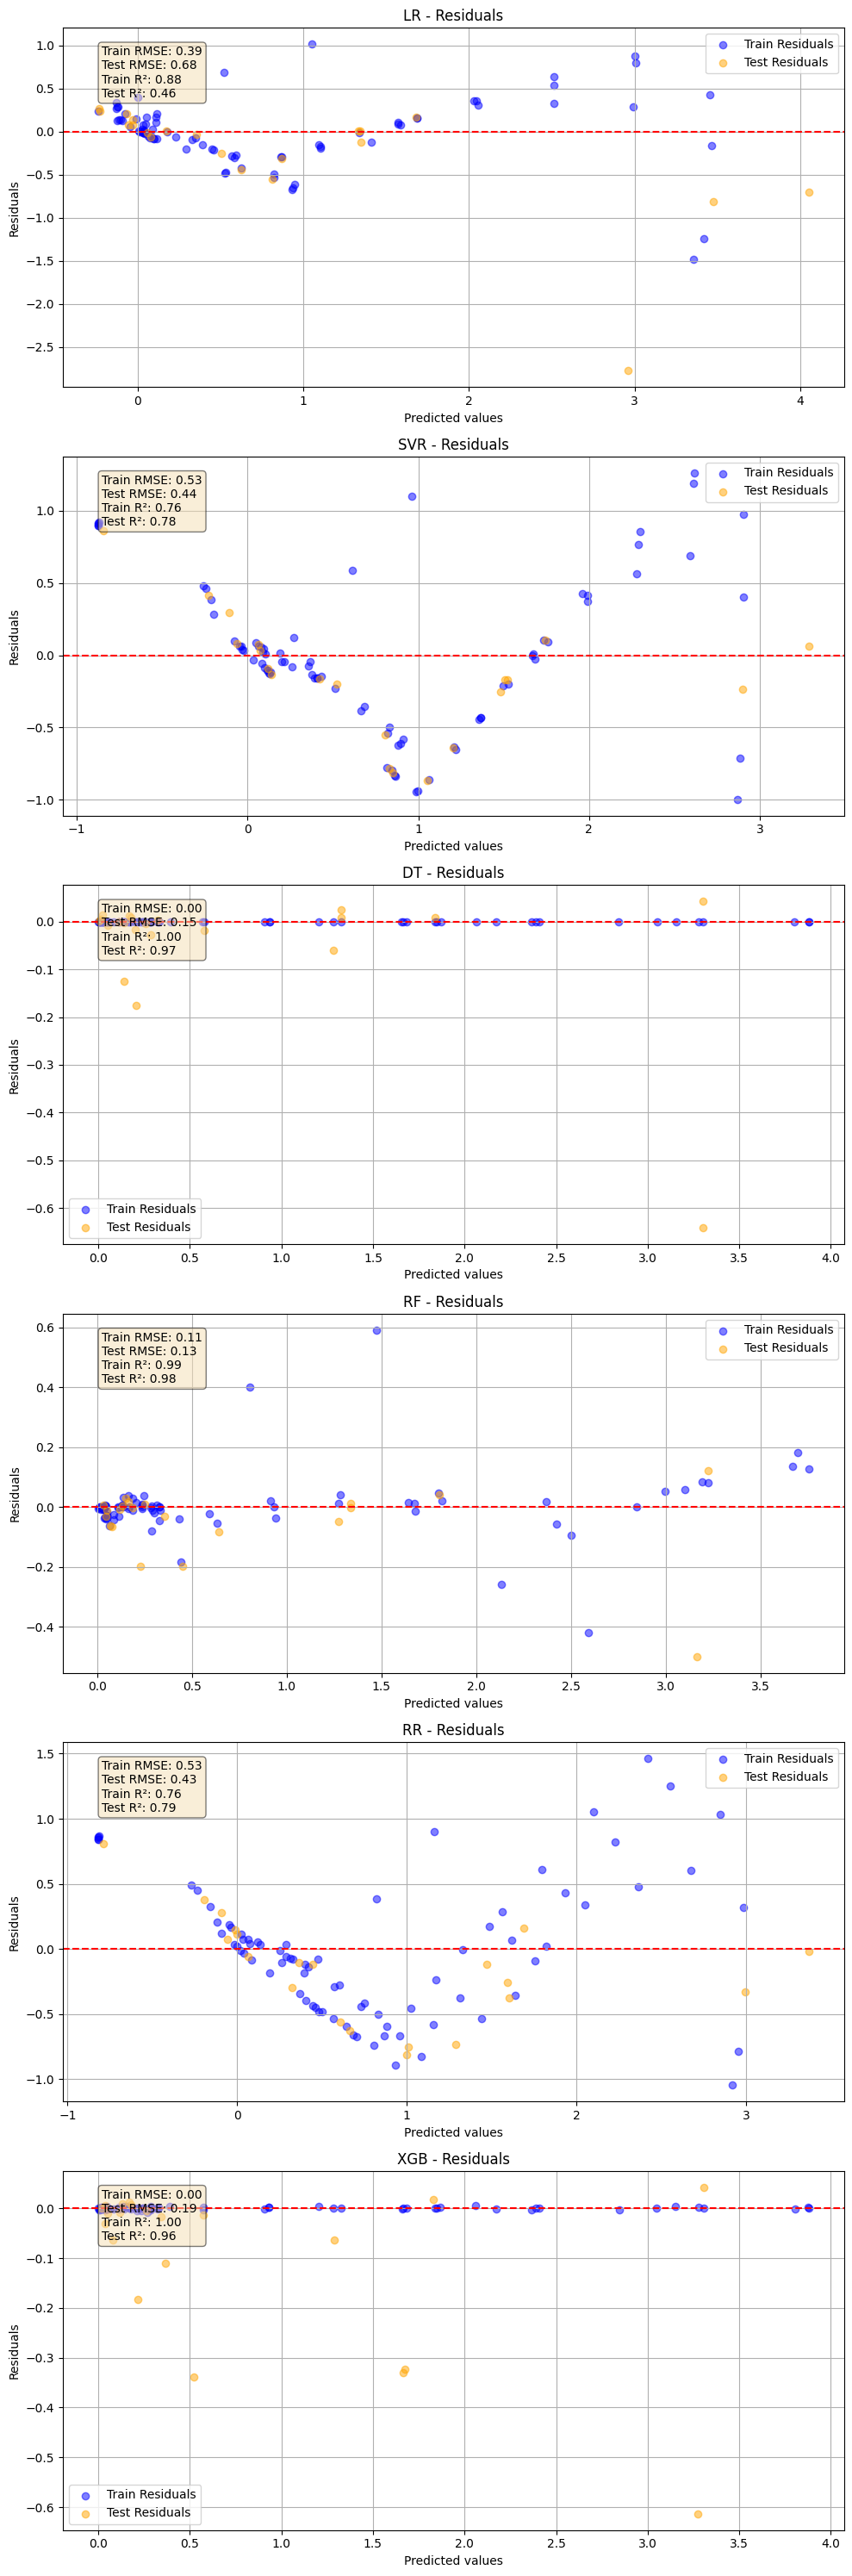

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Define your models
Models = {
    model1: 'LR',
    model3: 'SVR',
    dt_model: 'DT',
    rf_model: 'RF',
    rig_model: 'RR',
    xgb_model: 'XGB'
}

# Training models and plot residuals
n_models = len(Models)
fig, axs = plt.subplots(n_models, 1, figsize=(10, 5 * n_models))

for i, (model, name) in enumerate(Models.items()):  # Note the change here to get both key and value
    # Training the model
    model.fit(x_train, y_train)

    # Predicting on training and test set
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculating residuals
    train_residuals = y_train - y_train_pred
    test_residuals = y_test - y_test_pred

    # Calculating evaluation metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Plotting residuals for training and test sets on the same graph
    axs[i].scatter(y_train_pred, train_residuals, alpha=0.5, label='Train Residuals', color='blue')
    axs[i].scatter(y_test_pred, test_residuals, alpha=0.5, label='Test Residuals', color='orange')
    axs[i].axhline(0, color='red', linestyle='--')
    axs[i].set_title(f'{name} - Residuals')
    axs[i].set_xlabel('Predicted values')
    axs[i].set_ylabel('Residuals')
    axs[i].legend()
    axs[i].grid(True)

    # Displaying evaluation metrics
    metrics_text = f'Train RMSE: {train_rmse:.2f}\nTest RMSE: {test_rmse:.2f}\nTrain R²: {train_r2:.2f}\nTest R²: {test_r2:.2f}'
    axs[i].text(0.05, 0.95, metrics_text, transform=axs[i].transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))

plt.tight_layout()
plt.show()
